In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
twt_valid= pd.read_csv(r"C:\Users\HP\Downloads\INTERNSHIP\DS_04\twitter_validation.csv")
twt_valid.head()


,Tweet ID,Entity,Sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [3]:
twt_train= pd.read_csv(r"C:\Users\HP\Downloads\INTERNSHIP\DS_04\twitter_training.csv")
twt_train.head()


,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Data Preprocessing

In [4]:
missing_values_training = twt_train.isnull().sum()
missing_values_validation = twt_valid.isnull().sum()


In [5]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text


In [6]:
# Fill NaN values with empty strings
twt_train['Tweet content'] = twt_train['Tweet content'].fillna('')
twt_valid['Tweet content'] = twt_valid['Tweet content'].fillna('')


In [7]:
# Apply preprocessing to training and validation data
twt_train['Tweet content'] = twt_train['Tweet content'].apply(preprocess_text)
twt_valid['Tweet content'] = twt_valid['Tweet content'].apply(preprocess_text)


## Pre-Processing

In [8]:
import re

# Simplified preprocessing function
def preprocess_text_simple(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply simplified preprocessing to the Tweet content
twt_train['cleaned_tweet'] = twt_train['Tweet content'].apply(preprocess_text_simple)
twt_valid['cleaned_tweet'] = twt_valid['Tweet content'].apply(preprocess_text_simple)

# Display the cleaned tweet content
twt_train[['Tweet content', 'cleaned_tweet']].head()


,Tweet content,cleaned_tweet
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,i am coming to the borders and i will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you all,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...


## Visualizing Sentiment Distribution

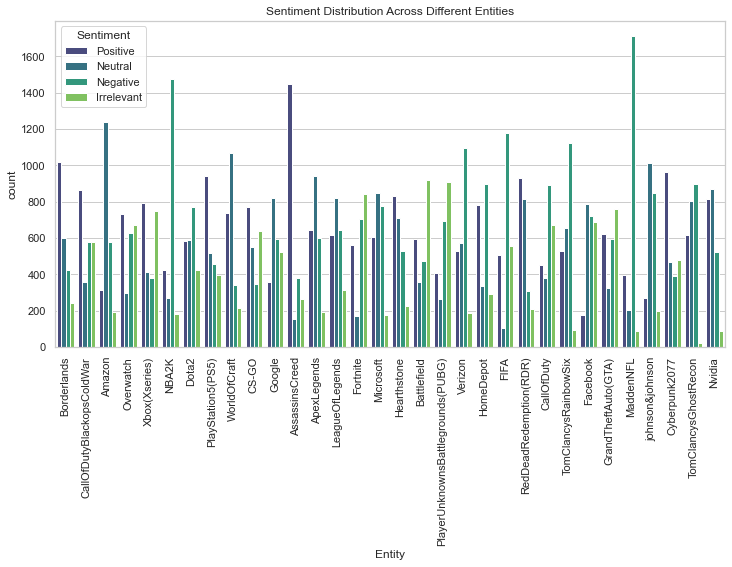

In [9]:
# Set plot style
sns.set(style="whitegrid")

# Plot sentiment distribution in the training data
plt.figure(figsize=(12, 6))
sns.countplot(data=twt_train, x='Entity', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution Across Different Entities')
plt.xticks(rotation=90)
plt.show()


### Sentiment Heatmap

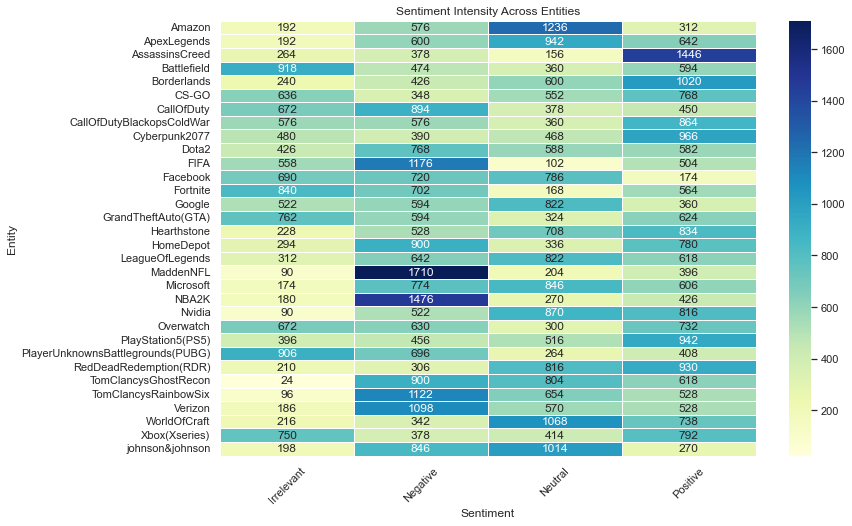

In [11]:
# Group data by entity and sentiment to count occurrences
entity_sentiment_counts = twt_train.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(entity_sentiment_counts, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Sentiment Intensity Across Entities')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## Correlation Analysis

### Preparing Data

In [15]:
# Create a list of unique entities
entities = twt_train['Entity'].unique()

# Create a binary matrix for entities
entity_matrix = pd.DataFrame(0, index=twt_train.index, columns=entities)

# Mark presence of entities in each tweet
for entity in entities:
    entity_matrix[entity] = twt_train['Entity'] == entity

# Display the first few rows of the entity matrix
entity_matrix.head()


,Borderlands,CallOfDutyBlackopsColdWar,Amazon,Overwatch,Xbox(Xseries),NBA2K,Dota2,PlayStation5(PS5),WorldOfCraft,CS-GO,...,RedDeadRedemption(RDR),CallOfDuty,TomClancysRainbowSix,Facebook,GrandTheftAuto(GTA),MaddenNFL,johnson&johnson,Cyberpunk2077,TomClancysGhostRecon,Nvidia
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Calculating Sentiment Score

In [16]:
# Map sentiment labels to numerical values
sentiment_score_mapping = {
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0,
    'Irrelevant': 0
}
twt_train['sentiment_score'] = twt_train['Sentiment'].map(sentiment_score_mapping)

# Display the first few rows to verify sentiment scores
twt_train[['Sentiment', 'sentiment_score']].head()


,Sentiment,sentiment_score
0,Positive,1
1,Positive,1
2,Positive,1
3,Positive,1
4,Positive,1


### Computing Correlation Matrix

In [19]:
# Compute correlation between entity presence and sentiment scores
correlation_matrix = entity_matrix.corrwith(twt_train['sentiment_score'])

# Convert the correlation matrix to a DataFrame for better readability
correlation_df = correlation_matrix.reset_index()
correlation_df.columns = ['Entity', 'Correlation']

# Display the correlation DataFrame
correlation_df


,Entity,Correlation
0,Borderlands,0.065956
1,CallOfDutyBlackopsColdWar,0.034294
2,Amazon,-0.021393
3,Overwatch,0.015703
4,Xbox(Xseries),0.047223
5,NBA2K,-0.100262
6,Dota2,-0.013240
7,PlayStation5(PS5),0.054714
8,WorldOfCraft,0.045194
9,CS-GO,0.048060


### Visualization

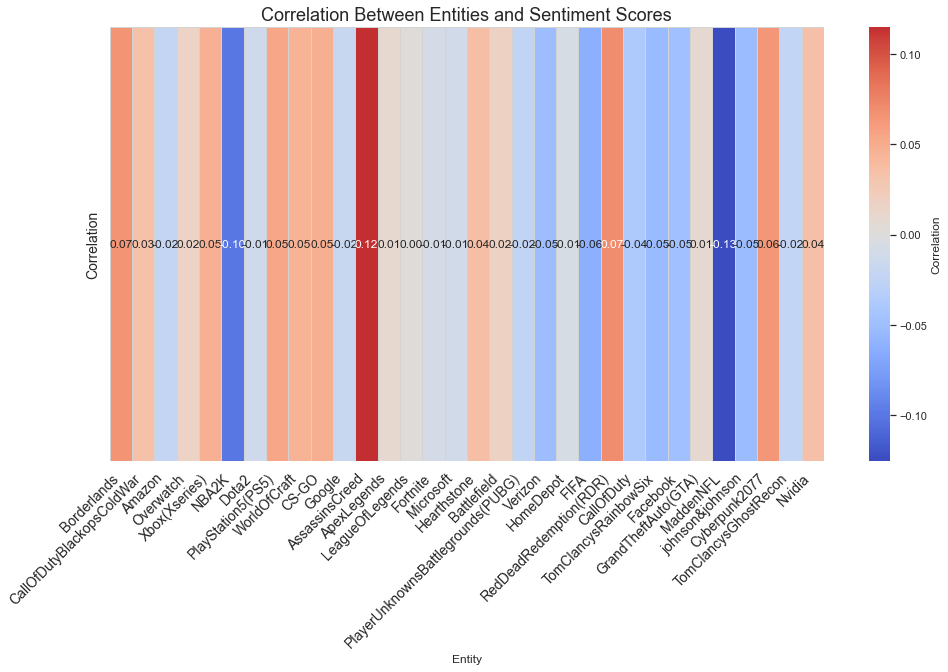

In [21]:
# Increase font size and remove grid lines for clarity
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_df.set_index('Entity').T, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            annot_kws={"size": 12}, cbar_kws={'label': 'Correlation'}, linewidths=0.5, linecolor='lightgrey')
plt.title('Correlation Between Entities and Sentiment Scores', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

